# **Titanic Dataset for Identification Survived Passenger using Classification Machine Learning** <br>

Variables:<br>
1. PassengerId : Unique
2. Survived : 0 (deceased) , 1 (survived)
3. Pclass : Ticket class, range (1, 2, 3)
4. Name : Name of passenger, Unique
5. Sex : Gender
6. SibSp : Number of siblings/spouse aboard the Titanic
7. Parch : Number of parents/children aboard the Titanic
8. Ticket : Ticket number
9. Fare : Passenger fare / tarif
10. Cabin : Cabin number/ location
11. Embarked : Starting port, C = Cherbourg, Q = Queenstown, S = Southampton<br>

# Beginning
The target should be the Survived, and the rest is features **except** PassengerId and Name

# Dataset Preparation

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 Home Work DQLab/03 Titanic Dataset Classification/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning

In [326]:
round((df.isnull().sum() / len(df))*100,2).sort_values(ascending=False) # Calculate percentage of NaN Data from overall data

,0
Cabin,77.10
Age,19.87
Embarked,0.22
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
SibSp,0.00
Parch,0.00


The Cabin and Age columns, mostly empty (NaN). Perhaps, I suggest that cabin (77.10%) should be depleted also with the Age Column. However, I'm gonna make option, with the Age Column as Model 1 and without the Age Column as Model 2.

Additionally, ticket is another not relevant parameter, since it is a unique number.

In [327]:
df_model_1 = df.drop(columns=['Cabin','Ticket']).dropna().reset_index(drop=True)
df_model_1 # Dataset Model 1 Preparation with Depletion of Cabin Columns and Age Columns "NaN" Value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
707,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
708,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
709,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
710,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [328]:
df_model_2 = df.drop(columns=['Cabin','Ticket','Age']).dropna().reset_index(drop=True)
df_model_2 # Dataset Model 2 Preparation with Depletion of Cabin and Age Columns

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,0,0,30.0000,C


In [329]:
print(df_model_1.duplicated().sum())
print(df_model_2.duplicated().sum())

0
0


# EDA

In [330]:
df_model_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


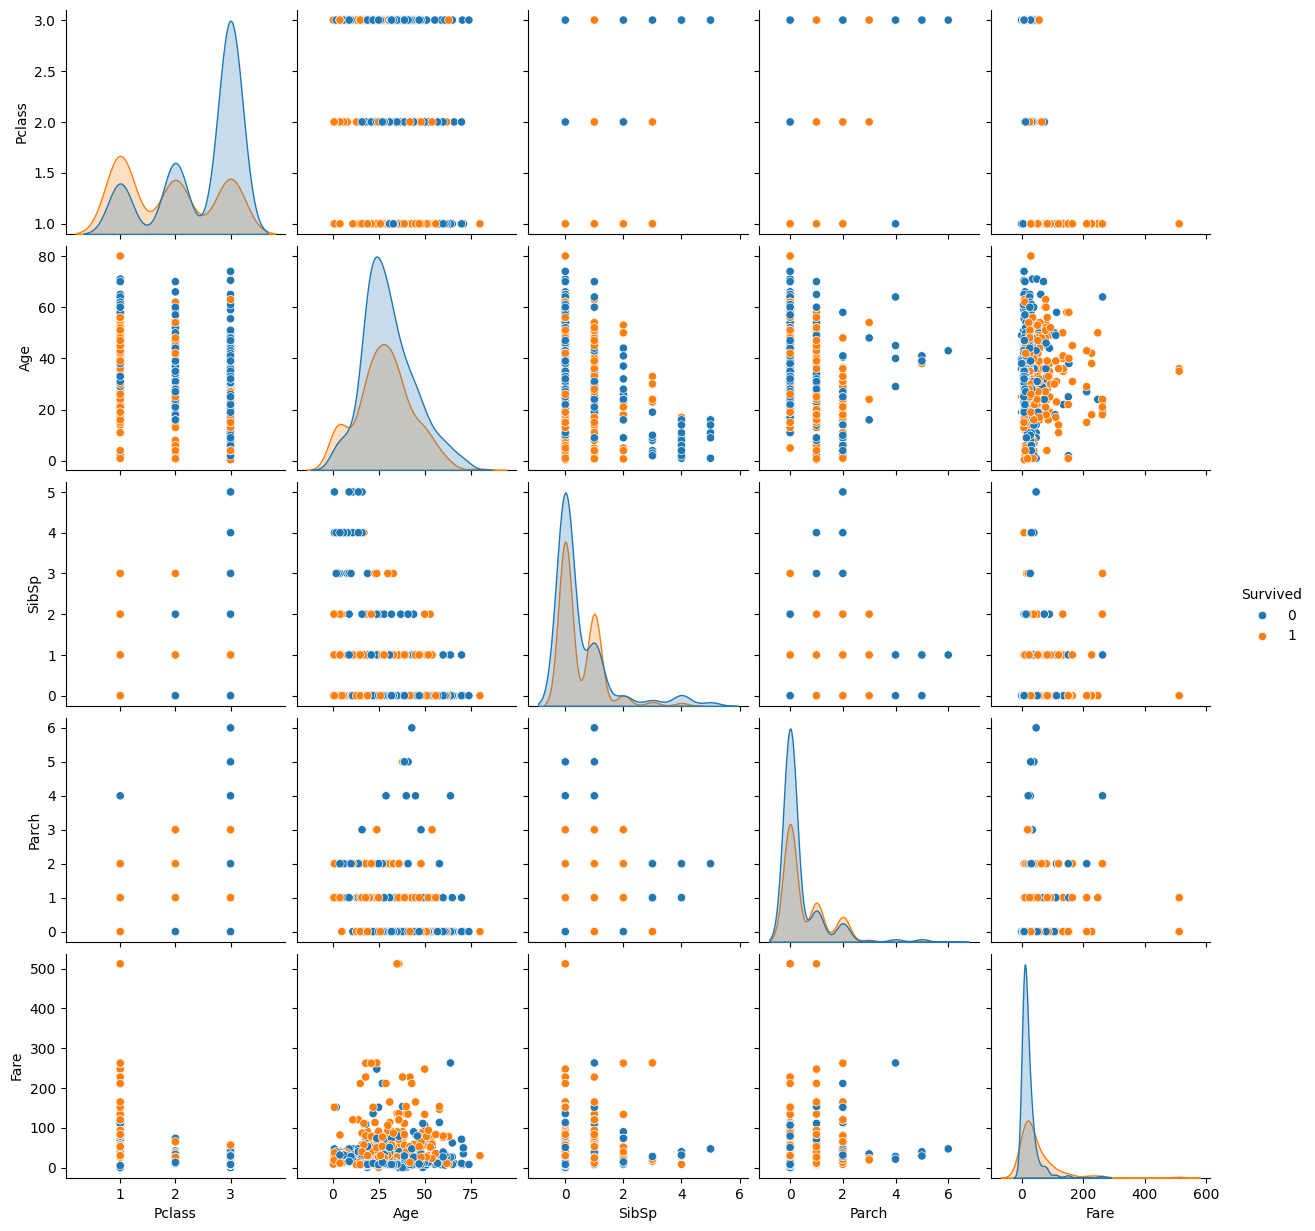

In [331]:
sns.pairplot(df_model_1.drop(columns='PassengerId'),hue='Survived') # Create pairplot for every corelation in variables
plt.show()

In [332]:
df_model_2.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


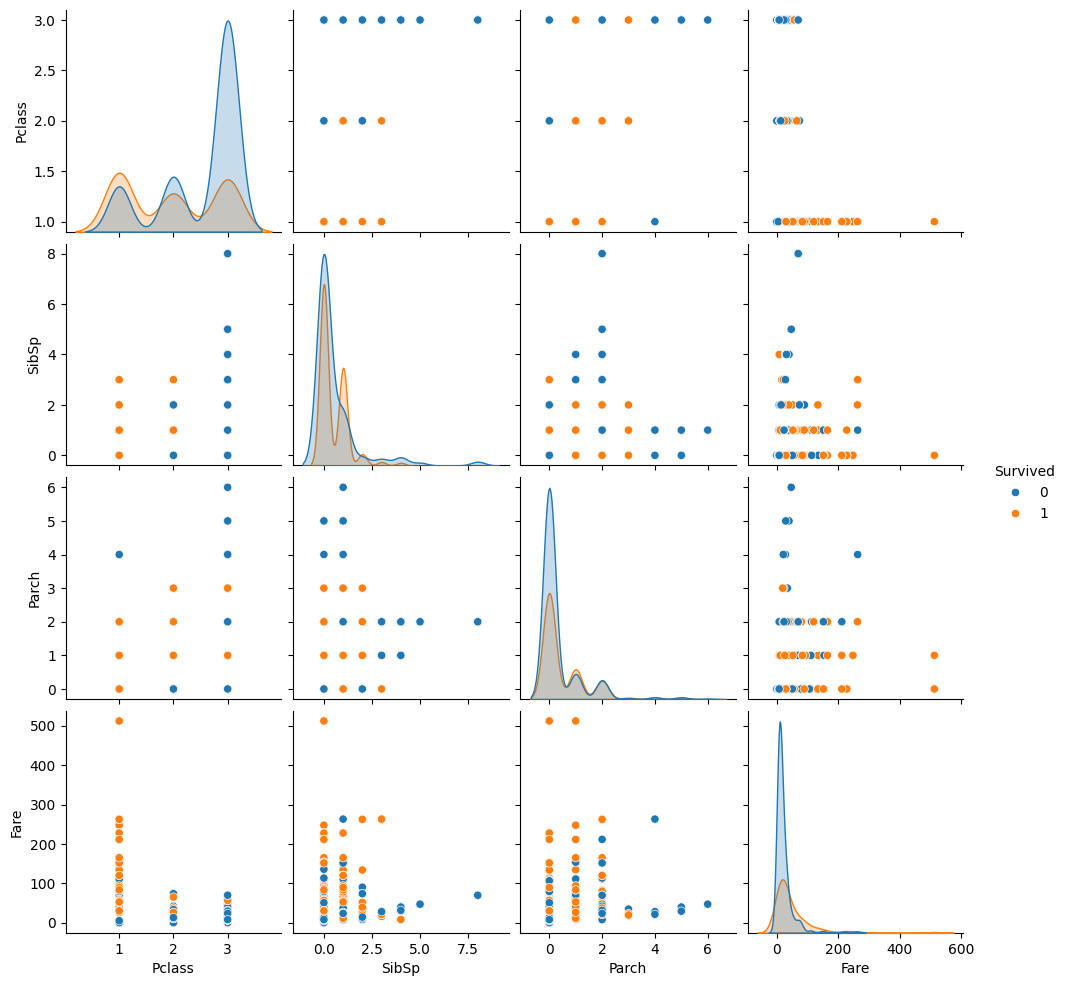

In [333]:
sns.pairplot(df_model_2.drop(columns='PassengerId'),hue='Survived') # Create pairplot for every corelation in variables
plt.show()

# Data Preprocessing

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
x1 = df_model_1.drop(columns=['PassengerId','Name','Survived'])
y1 = df_model_1['Survived']
x1 # Sex & Embarked should be adjusted. Sex can be change by 0 = female and 1 = male | Embarked can be change C = 1, Q = 2, S = 3

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
707,3,female,39.0,0,5,29.1250,Q
708,2,male,27.0,0,0,13.0000,S
709,1,female,19.0,0,0,30.0000,S
710,1,male,26.0,0,0,30.0000,C


In [336]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x1['Sex'] = le.fit_transform(x1['Sex'])
x1['Embarked'] = le.fit_transform(x1['Embarked'])
x1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
707,3,0,39.0,0,5,29.1250,1
708,2,1,27.0,0,0,13.0000,2
709,1,0,19.0,0,0,30.0000,2
710,1,1,26.0,0,0,30.0000,0


In [337]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.2,stratify=y1,random_state=42)
y1_train.value_counts() # The train y is not the same in each survived, maybe just because of not balance data?

,count
Survived,
0,339
1,230


In [338]:
y1_test.value_counts()

,count
Survived,
0,85
1,58


In [339]:
y1_train.value_counts() / y1_test.value_counts() # but the ratio are same, around 3.9

,count
Survived,
0,3.988235
1,3.965517




---



In [340]:
x2 = df_model_2.drop(columns=['PassengerId','Name','Survived'])
y2 = df_model_2['Survived']

In [341]:
x2['Sex'] = le.fit_transform(x2['Sex'])
x2['Embarked'] = le.fit_transform(x2['Embarked'])

In [342]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.2,stratify=y2,random_state=42)

# Data Modeling

In [343]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Model 1 - Classification

In [344]:
# SVM
svc_model = SVC()
svc_model.fit(x1_train,y1_train)
model_1_svc = svc_model.predict(x1_test)

In [345]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x1_train,y1_train)
model_1_dt = dt_model.predict(x1_test)

In [346]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(x1_train,y1_train)
model_1_rf = svc_model.predict(x1_test)

Model 2 - Classification


In [347]:
# SVM
svc_model = SVC()
svc_model.fit(x2_train,y2_train)
model_2_svc = svc_model.predict(x2_test)

In [348]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x2_train,y2_train)
model_2_dt = dt_model.predict(x2_test)

In [349]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x2_train,y2_train)
model_2_rf = svc_model.predict(x2_test)

# Evaluation

In [350]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def metrics (y_test,y_pred,method):
  classi_report = classification_report(y_test,y_pred,output_dict=True)
  classi_df = pd.DataFrame(classi_report).T
  classi_df['method'] = method
  return classi_df

Model 1

In [351]:
svc_1 = metrics(y1_test,model_1_svc,'SVC')
dt_1 = metrics(y1_test,model_1_dt,'DT')
rf_1 = metrics(y1_test,model_1_rf,'RF')

combined_df_1 = pd.concat([svc_1,dt_1,rf_1])
combined_df_1 = combined_df.reset_index().rename(columns={'index':'Metric'})
combined_df_1.round(3)

,Metric,Metric,precision,recall,f1-score,support,method
0,0,0,0.789,0.835,0.811,85.000,SVC
1,1,1,0.736,0.672,0.703,58.000,SVC
2,2,accuracy,0.769,0.769,0.769,0.769,SVC
3,3,macro avg,0.762,0.754,0.757,143.000,SVC
4,4,weighted avg,0.767,0.769,0.767,143.000,SVC
5,5,0,0.768,0.741,0.754,85.000,DT
6,6,1,0.639,0.672,0.655,58.000,DT
7,7,accuracy,0.713,0.713,0.713,0.713,DT
8,8,macro avg,0.704,0.707,0.705,143.000,DT
9,9,weighted avg,0.716,0.713,0.714,143.000,DT


# Model 1 Result

**SVC**
1. Accuracy : 76.9%
2. F1-Score Weighted Avg : 76.7%

**Decision Tree**
1. Accuracy : 71.3%
2. F1-Score Weighted Avg : 71.4%

**Random Forest**
1. Accuracy : 76.9%
2. F1-Score Weighted Avg : 76.7%
<br>

SVC and Random Forest have a same metrics number.

Model 2

In [352]:
svc_2 = metrics(y2_test,model_2_svc,'SVC')
dt_2 = metrics(y2_test,model_2_dt,'DT')
rf_2 = metrics(y2_test,model_2_rf,'RF')

combined_df_2 = pd.concat([svc_2,dt_2,rf_2])
combined_df_2 = combined_df.reset_index().rename(columns={'index':'Metric'})
combined_df_2.round(3)

,Metric,Metric,precision,recall,f1-score,support,method
0,0,0,0.789,0.835,0.811,85.000,SVC
1,1,1,0.736,0.672,0.703,58.000,SVC
2,2,accuracy,0.769,0.769,0.769,0.769,SVC
3,3,macro avg,0.762,0.754,0.757,143.000,SVC
4,4,weighted avg,0.767,0.769,0.767,143.000,SVC
5,5,0,0.768,0.741,0.754,85.000,DT
6,6,1,0.639,0.672,0.655,58.000,DT
7,7,accuracy,0.713,0.713,0.713,0.713,DT
8,8,macro avg,0.704,0.707,0.705,143.000,DT
9,9,weighted avg,0.716,0.713,0.714,143.000,DT


# Model 2 Result

**SVC**
1. Accuracy : 76.9%
2. F1-Score Weighted Avg : 76.7%

**Decision Tree**
1. Accuracy : 71.3%
2. F1-Score Weighted Avg : 71.4%

**Random Forest**
1. Accuracy : 76.9%
2. F1-Score Weighted Avg : 76.7%
<br>

SVC and Random Forest have a same metrics number.


---


# Conclusion
The best model i suggest for modeling the classification passenger of Titanic can be SVC or Random Forest.



---
Powered by : <br>
<img src="https://lh3.googleusercontent.com/ayfbbgvQolM_Ys9VYRVFD6FjDJXSebI9sN1VtY4ppp65dXepA6JCKgKMM_porWAErGQmc8l-L_RXq080SJ3FbYTIsyxYqWWTuAX8A3VtafWLUwAnnxNnjR1s-3BMCUlF34fYnViLuutxrLm3nEpoix0" width="20%">
<br><br>
<a href="www.linkedin.com/in/iqbalfauzanh"><img src="https://img.shields.io/badge/-© 2025 Iqbal Fauzan Herlambang-417DAC?style=for-the-badge&logoColor=white"/></a>